In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('DSL-StrongPasswordData.csv')
data = data.reset_index()

In [3]:
data.head()

,index,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,0,s002,1,1,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,...,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,1,s002,1,2,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,...,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,2,s002,1,3,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,...,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945
3,3,s002,1,4,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,...,0.1457,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387,0.0813
4,4,s002,1,5,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,...,0.1312,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614,0.0818


Data Pre-processing

In [4]:
#removing the irrelevant part from the 'subject' column
data['subject'] = data.subject.str.extract('(\d+)', expand=True).astype(int)

Let's try to find if any outliers exists. We will be considering 3 columns throughout this data set; 'H.period' , 'DD.e.five' and 'UD.o.a'

Mapping Index on the x-axis and H.period on the y-axis

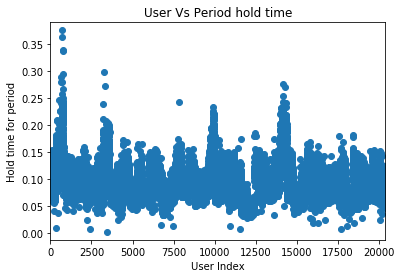

In [5]:
x = data.loc[:, 'index']
y = data.loc[:, 'H.period']
plt.scatter(x, y)
plt.autoscale(tight=True)
plt.title('User Vs Period hold time')
plt.ylabel('Hold time for period')
plt.xlabel('User Index')
plt.show()

It can be seen there are quiet a few outliers. 
The minimum and maximum can be found out as follows:

In [6]:
#Outlier with maximum hold time
data.loc[data['H.period'].idxmax()]

index              730.0000
subject              3.0000
sessionIndex         7.0000
rep                 31.0000
H.period             0.3761
DD.period.t          0.1403
UD.period.t         -0.2358
H.t                  0.1602
DD.t.i               0.1066
UD.t.i              -0.0536
H.i                  0.1816
DD.i.e               0.2091
UD.i.e               0.0275
H.e                  0.2360
DD.e.five            0.0855
UD.e.five           -0.1505
H.five               0.1103
DD.five.Shift.r      0.4218
UD.five.Shift.r      0.3115
H.Shift.r            0.1263
DD.Shift.r.o         0.2424
UD.Shift.r.o         0.1161
H.o                  0.1510
DD.o.a               0.1484
UD.o.a              -0.0026
H.a                  0.1563
DD.a.n               0.1270
UD.a.n              -0.0293
H.n                  0.1249
DD.n.l               0.1397
UD.n.l               0.0148
H.l                  0.1095
DD.l.Return          0.2384
UD.l.Return          0.1289
H.Return             0.1219
Name: 730, dtype: fl

In [7]:
#Outlier with minimum hold time
data.loc[data['H.period'].idxmin()]

index              3443.0000
subject              12.0000
sessionIndex          5.0000
rep                  44.0000
H.period              0.0014
DD.period.t           0.1280
UD.period.t           0.1266
H.t                   0.1270
DD.t.i                0.1437
UD.t.i                0.0167
H.i                   0.1201
DD.i.e                0.1135
UD.i.e               -0.0066
H.e                   0.1180
DD.e.five             0.7393
UD.e.five             0.6213
H.five                0.1473
DD.five.Shift.r       0.4179
UD.five.Shift.r       0.2706
H.Shift.r             0.1323
DD.Shift.r.o          0.2162
UD.Shift.r.o          0.0839
H.o                   0.1212
DD.o.a                0.1295
UD.o.a                0.0083
H.a                   0.1882
DD.a.n                0.1370
UD.a.n               -0.0512
H.n                   0.1094
DD.n.l                0.0906
UD.n.l               -0.0188
H.l                   0.1423
DD.l.Return           0.2575
UD.l.Return           0.1152
H.Return      

Mapping Index on the x-axis and DD.e.five on the y-axis

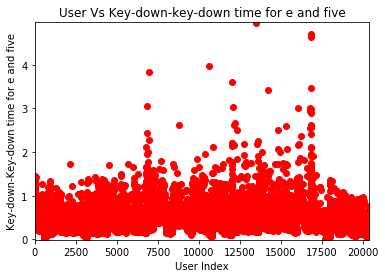

In [8]:
x = data.loc[:, 'index']
y = data.loc[:, 'DD.e.five']
plt.scatter(x, y,color='red')
plt.autoscale(tight=True)
plt.title('User Vs Key-down-key-down time for e and five')
plt.ylabel('Key-down-Key-down time for e and five')
plt.xlabel('User Index')
plt.show()

It can be seen that there are quiet a few outliers as well. The same method to find out the maximum and minimum can be used as done previously

Now, we'll try to find outliers in Key-up-key-down time of o and a

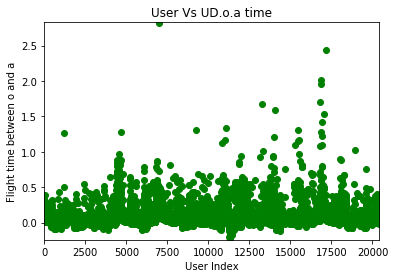

In [9]:
x = data.loc[:, 'index']
y = data.loc[:, 'UD.o.a']
plt.scatter(x, y,color='green')
plt.autoscale(tight=True)
plt.title('User Vs UD.o.a time')
plt.ylabel('Flight time between o and a')
plt.xlabel('User Index')
plt.show()